# The reach of Logic Tensor Networks

**Premise:** we suggest going through the tutorials (`/tutorial` folder) before going through these examples.

The objective of this series of examples is to show how the language of Real Logic can be used to specify a number of
tasks that involve learning from data and reasoning. Examples of such tasks are classification（分类）, regression（回归）, clustering（聚类）,
link prediction（链接预测）, etc.

The solution of a problem specified in Real Logic is obtained by interpreting such a specification in Logic Tensor Networks.
The LTN library implements Real Logic in PyTorch. Every logical operator is grounded using PyTorch primitives such that
LTN implements directly a PyTorch graph. Due to PyTorch built-in optimization, LTN is relatively efficient while
providing the expressive power of first-order logic.

The first tutorial that we will see is based on one of the most simple and intuitive machine learning tasks, the binary
classification.

## Binary classification

The simplest machine learning task is binary classification. Suppose that one wants to learn a binary classifier $A$ for
a set of points in $[0, 1]^2$. Suppose that a set of positive and negative training examples is given.

LTN uses the following language and grounding:

**Domains:**
- $points$ (denoting the examples);

**Variables:**
- $x_+$ for the positive examples;
- $x_-$ for the negative examples;
- $x$ for all examples;
- $D(x) = D(x_+) = D(x_-) = points$, where $D(.)$ is a function which returns the domain of a non-logical symbol given in input.

**Predicates:**
- $A(x)$ for the trainable classifier;
- $D_{in}(A) = points$, where $D_{in}(.)$ is a function which returns the domain of the input of a function or predicate
given in input.

**Axioms:**（公理）

- $\forall x_+ A(x_+)$: the predicate must be true for positive examples;
- $\forall x_- \lnot A(x_-)$: the predicate must be false for negative examples.

**Grounding:**
- $\mathcal{G}(points)=[0,1]^{2}$;
- $\mathcal{G}(x) \in[0,1]^{m \times 2}$: $\mathcal{G}(x)$ is a sequence of $m$ points, that is, $m$ examples;
- $\mathcal{G}\left(x_{+}\right)=\langle d \in \mathcal{G}(x) \mid\|d-(0.5,0.5)\|<0.09\rangle$: $\mathcal{G}(x_+)$ are,
by definition in this example, the training examples with Euclidean distance to the center $(0.5, 0.5)$ smaller than
the threshold of 0.09;
- $\mathcal{G}\left(x_{+}\right)=\langle d \in \mathcal{G}(x) \mid\|d-(0.5,0.5)\|>=0.09\rangle$: $\mathcal{G}(x_+)$ are,
by definition in this example, the training examples with Euclidean distance to the center $(0.5, 0.5)$ larger or equal
to the threshold of 0.09;
- $\mathcal{G}(A \mid \theta): x \mapsto \sigma\left(\operatorname{MLP}_{\theta}(x)\right)$, where $MLP$
is a Multi-Layer Perceptron with a single output neuron, whose parameters $\theta$ have to be learned.


### Dataset

Now, let's define our toy dataset with points in $[0, 1]^2$. We randomly generate 100 points, and we give them some labels
according to the *grounding* defined above. So, points near the center will be classified as positives, while points distant
from the center will be classified as negatives.

# 逻辑张量网络的应用范围

**前提**：建议在阅读这些示例之前先完成教程（`/tutorial` 文件夹）。

这一系列示例的目标是展示如何使用实数逻辑语言来指定涉及数据学习和推理的多个任务。这些任务的示例包括分类、回归、聚类、链接预测等。

在逻辑张量网络（LTN）中，通过解释用实数逻辑指定的问题来获得其解决方案。LTN库在PyTorch中实现了实数逻辑。每个逻辑运算符都使用PyTorch原语进行基础化，使LTN直接实现了PyTorch图。由于PyTorch的内置优化，LTN在提供一阶逻辑的表达能力的同时，具有相对较高的效率。

我们将首先看到的教程基于最简单且直观的机器学习任务之一，即二分类。

## 二分类

最简单的机器学习任务是二分类。假设需要为 $[0, 1]^2$ 中的一组点学习一个二分类器 $A$。假设给定了一组正负训练样本。

LTN使用以下语言和基础化：

**领域：**
- $points$（表示样本）；

**变量：**
- $x_+$ 表示正样本；
- $x_-$ 表示负样本；
- $x$ 表示所有样本；
- $D(x) = D(x_+) = D(x_-) = points$，其中 $D(.)$ 是一个函数，返回输入的非逻辑符号的域。（$D(.)$ is a function which returns the domain of a non-logical symbol given in input.）

**谓词：**
- $A(x)$ 表示可训练分类器；
- $D_{in}(A) = points$，其中 $D_{in}(.)$ 是一个函数，返回输入的函数或谓词的域。

**公理：**（这里的公理，应该就是我们之前知识库里面的那些逻辑公式）

- (自)我希望谓词A能够区分输入的点是正样本还是负样本，或者说，区分输入的点是不是正样本。谓词A的最原始的含义应该是，这个点是正样本的概率，或者说置信度。将正样本分类为真，或者说接近于1，而将负样本分类为假，或者说接近于0。
- 而我们又知道，谓词其实是从知识库中进行学习的，因为我们是根据让loss不断下降来学习的，或者说，我们是根据让知识库的总体满足率不断提高来学习的。我想要学的怎样的知识，就需要在知识库中定义怎样的公理，这样，我就可以通过让loss不断下降，或者让知识库的总体满足率不断提高，来学习到我想要的知识。

- $\forall x_+ A(x_+)$：谓词对正样本为真；
- $\forall x_- \lnot A(x_-)$：谓词对负样本为假。

**基础化：**
- $\mathcal{G}(points)=[0,1]^{2}$；
- $\mathcal{G}(x) \in[0,1]^{m \times 2}$：$\mathcal{G}(x)$ 是 $m$ 个点的序列，即 $m$ 个样本；
- $\mathcal{G}\left(x_{+}\right)=\langle d \in \mathcal{G}(x) \mid\|d-(0.5,0.5)\|<0.09\rangle$：$\mathcal{G}(x_+)$ 在本示例中，定义为欧氏距离到中心 $(0.5, 0.5)$ 小于0.09的训练样本；
- $\mathcal{G}\left(x_{-}\right)=\langle d \in \mathcal{G}(x) \mid\|d-(0.5,0.5)\|\geq0.09\rangle$：$\mathcal{G}(x_-)$ 在本示例中，定义为欧氏距离到中心 $(0.5, 0.5)$ 大于或等于0.09的训练样本；
- $\mathcal{G}(A \mid \theta): x \mapsto \sigma\left(\operatorname{MLP}_{\theta}(x)\right)$，其中 $MLP$ 是一个具有单输出神经元的多层感知机，其参数 $\theta$ 需要学习。

### 数据集

现在，我们定义一个包含 $[0, 1]^2$ 中点的玩具数据集。我们随机生成100个点，并根据上述基础化给它们打标签。因此，接近中心的点将被分类为正样本，而远离中心的点将被分类为负样本。

好的，让我们逐步详细解释这段公式和符号的含义：

### $\mathcal{G}(x) \in [0,1]^{m \times 2}$

这段公式表示变量 $x$ 在域 $\mathcal{G}$ 中的取值范围和结构。以下是逐步解释：

1. **$\mathcal{G}(x)$**：
   - 这里的 $\mathcal{G}$ 表示一个基础化（grounding）函数。
   - $\mathcal{G}(x)$ 表示变量 $x$ 在基础化之后的取值。

2. **$\in$**：
   - 这个符号表示“属于”或“在……范围内”。

3. **$[0,1]^{m \times 2}$**：
   - 这个符号表示一个形状为 $m \times 2$ 的矩阵，其中每个元素的取值范围在 $[0, 1]$ 之间。
   - 具体来说：
     - $[0,1]$ 表示数值在 0 和 1 之间（包括 0 和 1）。
     - $m \times 2$ 表示这个矩阵有 $m$ 行和 2 列。

### 综合解释

$$\mathcal{G}(x) \in [0,1]^{m \times 2}$$

- **含义**：
  - 变量 $x$ 在基础化后是一个 $m \times 2$ 的矩阵，其中 $m$ 表示样本的数量，每个样本有两个特征。
  - 这些特征的取值范围都在 0 到 1 之间。

### 示例

假设我们有 3 个样本，每个样本有 2 个特征，这些特征的值都在 0 和 1 之间。则 $\mathcal{G}(x)$ 可以表示为：

$$
\mathcal{G}(x) = 
\begin{bmatrix}
0.2 & 0.3 \\
0.4 & 0.5 \\
0.6 & 0.7
\end{bmatrix}
$$

这里的矩阵有 3 行（表示 3 个样本）和 2 列（表示每个样本的 2 个特征），且所有值都在 0 和 1 之间。

通过以上解释，希望您对 $\mathcal{G}(x) \in [0,1]^{m \times 2}$ 这段公式有了清晰的理解。如果有其他符号需要解释，或者有进一步的问题，请随时告诉我。

好的，下面我们逐步详细解释这个符号 $\mathcal{G}(points)=[0,1]^{2}$ 及其含义：

### 符号解析

1. **$\mathcal{G}$**：
   - $\mathcal{G}$ 是一个函数符号，通常用来表示“基础化”（grounding）。在逻辑张量网络中，基础化是将抽象的逻辑符号（如域、谓词）映射到具体的数据表示上。

2. **$points$**：
   - $points$ 是逻辑域的名称。在这个上下文中，它表示所有的样本点的集合。

3. **$[0, 1]^{2}$**：
   - $[0, 1]^{2}$ 是一个数学符号，表示一个二维的单位正方形。具体来说，这意味着所有点的 x 和 y 坐标都在 0 到 1 之间。
   - 这个表示方式源自集合论，$[0, 1]^{2}$ 意味着一个笛卡尔积，即两个 [0, 1] 区间的乘积。换句话说，它表示一个 2D 空间，x 和 y 坐标分别在 [0, 1] 区间内。

### 解释 $\mathcal{G}(points)=[0,1]^{2}$

1. **函数 $\mathcal{G}$ 的作用**：
   - 函数 $\mathcal{G}$ 将逻辑域 $points$ 基础化为具体的数值表示。这意味着在逻辑模型中，$points$ 被映射到一个具体的数学对象上。

2. **具体的基础化结果**：
   - 在这个例子中，$\mathcal{G}(points)=[0,1]^{2}$ 表示逻辑域 $points$ 的所有元素都对应于 $[0, 1]^{2}$ 中的点。换句话说，所有样本点都在一个二维的单位正方形内。

### 应用场景

在机器学习任务中，定义数据的域和其基础化非常重要。这个符号表述了在逻辑张量网络中如何将逻辑域 $points$ 映射到具体的数据空间。以下是几个具体的应用场景：

1. **定义数据空间**：
   - 通过 $\mathcal{G}(points)=[0,1]^{2}$，我们明确了数据点位于 $[0, 1]^{2}$ 这个区域内。

2. **逻辑推理**：
   - 当我们进行逻辑推理时，我们可以使用这个基础化结果来定义各种逻辑规则和约束。例如，可以定义某些逻辑谓词适用于 $[0, 1]^{2}$ 中的点。

### 进一步解释

如果你有任何特定的符号或部分不理解，请告诉我，我会进一步详细解释。通过理解这些基础化和符号，可以更好地掌握逻辑张量网络在具体机器学习任务中的应用。

公式：
$$
\mathcal{G}(A \mid \theta): x \mapsto \sigma\left(\operatorname{MLP}_{\theta}(x)\right)
$$

### 逐步解释

1. **基础化（Grounding）**：
   - 公式中的 $\mathcal{G}$ 表示基础化函数（Grounding function）。这个函数用于将逻辑符号映射到具体的数学表示。

2. **谓词 $A$**：
   - $A$ 是一个逻辑谓词，表示分类器。

3. **参数 $\theta$**：
   - $\theta$ 表示分类器的参数。在多层感知机（MLP）中，这些参数是模型的权重和偏置。

4. **条件符号 $|$**：
   - $\mid$ 表示给定参数 $\theta$ 的条件下。

5. **输入变量 $x$**：
   - $x$ 表示输入数据点。这里，$x$ 是一个点的特征向量。

6. **映射符号 $\mapsto$**：
   - $\mapsto$ 表示映射关系。它表示将 $x$ 映射到某个输出。

7. **多层感知机（MLP）**：
   - $\operatorname{MLP}_{\theta}$ 表示一个多层感知机（Multi-Layer Perceptron），其参数是 $\theta$。MLP 是一种神经网络，用于进行非线性变换和分类任务。

8. **激活函数 $\sigma$**：
   - $\sigma$ 表示激活函数，通常是 sigmoid 函数。它将 MLP 的输出变换到 $[0, 1]$ 区间，用于表示概率值。

### 完整解释

$$
\mathcal{G}(A \mid \theta): x \mapsto \sigma\left(\operatorname{MLP}_{\theta}(x)\right)
$$

这意味着，在给定参数 $\theta$ 的条件下，逻辑谓词 $A$ 的基础化（Grounding）是一个从输入 $x$ 到输出的映射过程。具体过程如下：

1. **输入 $x$**：将输入数据点 $x$ 传入多层感知机（MLP）。
2. **MLP 计算**：MLP 通过一系列线性和非线性变换，计算输出。
3. **激活函数 $\sigma$**：对 MLP 的输出应用 sigmoid 激活函数，将其变换到 $[0, 1]$ 区间，表示为逻辑谓词 $A$ 的概率值。

因此，这个公式表示逻辑张量网络中的分类器 $A$ 的工作原理，即如何将输入数据点 $x$ 转换为一个概率值，表示该点属于某一类别的概率。

In [1]:
import torch
import matplotlib.pyplot as plt
nr_samples = 100 # 设置样本数量为 100。
dataset = torch.rand((nr_samples, 2)) # torch.rand((nr_samples, 2))：生成一个形状为 (100, 2) 的张量，每个元素都是在 [0, 1) 区间内的随机数。这代表了 100 个样本，每个样本有两个特征。
labels_dataset = torch.sum(torch.square(dataset - torch.tensor([.5, .5])), dim=1) < .09 # labels_dataset：一个布尔张量，张量的每个值是True或False。True表示对应的样本在距离中心点 (0.5, 0.5) 的欧氏距离为 0.3 以内，False表示距离大于 0.3。

In [2]:
print("labels_dataset:\n", labels_dataset)
print("type(labels_dataset):", type(labels_dataset))

labels_dataset:
 tensor([False, False, False, False, False,  True, False, False,  True,  True,
        False, False,  True, False, False,  True, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,  True,
        False, False, False, False, False,  True,  True,  True, False, False,
        False,  True, False, False,  True, False, False,  True,  True, False,
        False, False,  True, False, False, False,  True,  True, False, False,
         True, False, False, False, False, False,  True, False, False, False,
        False,  True,  True, False, False, False, False, False, False, False,
        False, False,  True,  True, False, False, False,  True, False,  True,
         True, False, False,  True, False,  True, False,  True, False,  True])
type(labels_dataset): <class 'torch.Tensor'>


#### 计算标签
```python
labels_dataset = torch.sum(torch.square(dataset - torch.tensor([.5, .5])), dim=1) < .09
```
- `torch.tensor([.5, .5])`：创建一个张量，表示中心点 `(0.5, 0.5)`。
- `dataset - torch.tensor([.5, .5])`：将数据集中的每个样本减去中心点 `(0.5, 0.5)`，得到每个样本相对于中心点的偏移。
- `torch.square(...)`：对偏移进行平方运算，得到每个样本相对于中心点的平方距离。
- `torch.sum(..., dim=1)`：沿着特征维度（即每个样本的两个特征），将平方距离相加，得到每个样本相对于中心点的平方距离和。
- `< .09`：判断每个样本的平方距离和是否小于 `0.09`，返回一个布尔张量，其中每个元素表示对应样本是否在距离中心点 `(0.5, 0.5)` 的欧氏距离为 `sqrt(0.09) = 0.3` 以内。

Let's plot our dataset and see that points around the center have a positive label, while points far from the center have negative labels. # 让我们绘制我们的数据集，并看看中心周围的点具有正标签，而远离中心的点具有负标签。

```python
plt.scatter(dataset[labels_dataset][:,0],dataset[labels_dataset][:,1],label='A')
```
- `plt.scatter(...)`：绘制一个散点图。
- `dataset[labels_dataset]`：根据 `labels_dataset` 筛选出正类样本。`labels_dataset` 是一个布尔张量，只有为 `True` 的样本会被选出。
- `[:,0]`：表示选出正类样本的第一个特征（x 坐标）。
- `[:,1]`：表示选出正类样本的第二个特征（y 坐标）。
- `label='A'`：为这些点添加标签 "A"。

```python
plt.scatter(dataset[torch.logical_not(labels_dataset)][:,0],dataset[torch.logical_not(labels_dataset)][:,1],label='~A')
```
- `plt.scatter(...)`：绘制另一个散点图。
- `dataset[torch.logical_not(labels_dataset)]`：根据 `labels_dataset` 筛选出负类样本。`torch.logical_not(labels_dataset)` 返回 `labels_dataset` 的按位取反，即原来为 `True` 的位置变为 `False`，原来为 `False` 的位置变为 `True`。
- `[:,0]`：表示选出负类样本的第一个特征（x 坐标）。
- `[:,1]`：表示选出负类样本的第二个特征（y 坐标）。
- `label='~A'`：为这些点添加标签 "~A"。
### 总结
这段代码的目的是可视化分类结果。正类样本和负类样本分别用不同颜色的散点表示，并带有标签 "A" 和 "~A"。图形的标题是 "Ground truth"，图例显示了每种样本类型的标签。

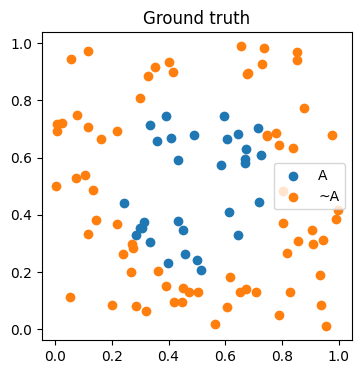

In [3]:
plt.figure(figsize=(4,4))
plt.scatter(dataset[labels_dataset][:,0],dataset[labels_dataset][:,1],label='A')
plt.scatter(dataset[torch.logical_not(labels_dataset)][:,0],dataset[torch.logical_not(labels_dataset)][:,1],label='~A')
plt.title("Ground truth")
plt.legend()
plt.show()

### LTN setting

In order to define our knowledge base (axioms), we need to define predicate $A$, the connectives, quantifiers, and the
`SatAgg` operator.

For the connective and quantifiers, we use the stable product configuration (seen in the tutorials). For predicate $A$, we use a simple $MLP$
implemented as a `torch.nn.Module`.

`SatAgg` is the SAT aggregator, an operator which aggregates the truth values of all the closed
formulas included in the knowledge base. The `SatAgg`, by default, is implemented using the `pMeanError` aggregator.

### LTN 设置

为了定义我们的知识库（公理），我们需要定义谓词 $ A $、连接词、量词和 `SatAgg` 运算符。

对于连接词和量词，我们使用稳定的乘积配置（在教程中见过）。对于谓词 $ A $，我们使用一个简单的多层感知机（MLP），它实现为一个 `torch.nn.Module`。

`SatAgg` 是 SAT 聚合器，一个将知识库中所有闭合公式的真值聚合起来的运算符。默认情况下，`SatAgg` 使用 `pMeanError` 聚合器实现。

In [4]:
import ltn
# we define predicate A # 我们定义谓词 A
class ModelA(torch.nn.Module):
    def __init__(self):
        super(ModelA, self).__init__()
        self.sigmoid = torch.nn.Sigmoid()
        self.layer1 = torch.nn.Linear(2, 16)
        self.layer2 = torch.nn.Linear(16, 16)
        self.layer3 = torch.nn.Linear(16, 1)
        self.elu = torch.nn.ELU()

    def forward(self, x):
        x = self.elu(self.layer1(x))
        x = self.elu(self.layer2(x))
        return self.sigmoid(self.layer3(x))
# 可见，A这个谓词的输出应该是，输入一个数据点，输出一个概率值，表示这个数据点属于正类的概率。

# A = ltn.Predicate(ModelA()) # 原来的写法会报错
A = ltn.Predicate(ModelA().to(ltn.device)) # 创建了一个谓词 A，使用 ModelA 作为底层模型

# we define the connectives, quantifiers, and the SatAgg # 我们定义连接词、量词和 SatAgg
Not = ltn.Connective(ltn.fuzzy_ops.NotStandard()) # 用标准的模糊逻辑否定操作
Forall = ltn.Quantifier(ltn.fuzzy_ops.AggregPMeanError(p=2), quantifier="f") # 使用 p 均值误差聚合器
SatAgg = ltn.fuzzy_ops.SatAgg() #  SAT 聚合器，用于聚合知识库中所有闭合公式的真值

### Utils

Now, we need to define some utility classes and functions.

We define a standard PyTorch data loader, which takes as input the dataset and returns a generator of batches of data.
In particular, we need a data loader instance for training data and one for testing data. 50 examples are selected
for training, 50 examples are selected for testing.

Then, we define functions to evaluate the model performances. The model is evaluated on the test set using the following metrics:
- the satisfaction level of the knowledge base: measure the ability of LTN to satisfy the knowledge;
- the classification accuracy: measure the quality of the predictions.

### 工具

现在，我们需要定义一些实用的类和函数。

我们定义了一个标准的 PyTorch 数据加载器，它以数据集为输入，返回数据批次的生成器。特别是，我们需要一个用于训练数据的加载器实例和一个用于测试数据的加载器实例。50 个示例用于训练，50 个示例用于测试。

然后，我们定义评估模型性能的函数。模型使用以下指标在测试集上进行评估：
- 知识库的满足度：衡量 LTN 满足知识的能力；
- 分类准确性：衡量预测的质量。

In [5]:
print("range(0, 10, 2):", range(0, 10, 2))
print("type(range(0, 10, 2)):", type(range(0, 10, 2)))

range(0, 10, 2): range(0, 10, 2)
type(range(0, 10, 2)): <class 'range'>


In [6]:
from sklearn.metrics import accuracy_score # 导入 accuracy_score 用于计算准确率。
import numpy as np

# this is a standard PyTorch DataLoader to load the dataset for the training and testing of the model # 这是一个标准的 PyTorch DataLoader，用于加载数据集以训练和测试模型
class DataLoader(object):
    def __init__(self,
                 data,
                 labels,
                 batch_size=1,
                 shuffle=True):
        self.data = data
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle

    def __len__(self):
        return int(np.ceil(self.data.shape[0] / self.batch_size)) # 之所以需要使用int，是因为 np.ceil 返回的是浮点数

    def __iter__(self): #  __iter__方法实现迭代器协议，返回每个批次的数据和标签。
        n = self.data.shape[0]
        idxlist = list(range(n))
        if self.shuffle:
            np.random.shuffle(idxlist)

        for _, start_idx in enumerate(range(0, n, self.batch_size)):
            end_idx = min(start_idx + self.batch_size, n)
            data = self.data[idxlist[start_idx:end_idx]]
            labels = self.labels[idxlist[start_idx:end_idx]]

            yield data, labels # 返回的data的类型与输入的data的类型相同，labels的类型与输入的labels的类型相同


# define metrics(指标) for evaluation of the model # 定义用于评估模型的指标

# it computes the overall satisfaction level on the knowledge base using the given data loader (train or test) # 使用给定的数据加载器（训练或测试）计算知识库的整体满足度
# 这个函数的相关解释在ex1.md的## 1中
def compute_sat_level(loader): # compute_sat_level 函数计算知识库的整体满足度。
    mean_sat = 0
    for data, labels in loader:
        # 创建正例和负例的 LTN 变量。
        x_A = ltn.Variable("x_A", data[torch.nonzero(labels)])  # positive examples # 正例
        x_not_A = ltn.Variable("x_not_A",data[torch.nonzero(torch.logical_not(labels))])  # negative examples # 负例
        
        mean_sat += SatAgg(
            Forall(x_A, A(x_A)),
            Forall(x_not_A, Not(A(x_not_A)))
        ) # 计算并累加满足度。
    mean_sat /= len(loader) # 计算平均满足度
    return mean_sat

# it computes the overall accuracy of the predictions of the trained model using the given data loader # 使用给定的数据加载器计算训练模型的预测的整体准确性
# (train or test) # （训练或测试）
# 这个函数的相关解释在ex1.md的## 2中
def compute_accuracy(loader): # compute_accuracy 函数计算模型预测的整体准确性。
    mean_accuracy = 0.0 # 初始化 mean_accuracy 为 0.0，用于累加每个批次的准确性。
    for data, labels in loader:
        # predictions = A.model(data).detach().numpy() # 原来的写法会报错
        
        # 为了Debug
        # print("type(A.model:\n", type(A.model))
        # print("A.model:\n", A.model)
        # print("data:\n", data)
        # print(A.model(data.to(ltn.device)))
        
        predictions = A.model(data.to(ltn.device)).detach().cpu().numpy() # 获取模型预测值并将其转为 numpy 数组。
        predictions = np.where(predictions > 0.5, 1., 0.).flatten() # 将预测值转换为二分类结果（0 或 1）。
        mean_accuracy += accuracy_score(labels, predictions) # 计算并累加每个批次的准确性。
        # 计算准确性的时候，1和true是等价的，0和false是等价的

    return mean_accuracy / len(loader) # 返回平均准确性。

# create train and test loader, 50 points each # 创建训练和测试加载器，每个加载器包含 50 个点
# batch size is 64, meaning there is only one batch for epoch # 批量大小为 64，意味着每个周期只有一个批次
# 一共100个点，前50个作为训练集，后50个作为测试集。之后需要将训练集和测试集都各自在 DataLoader 中分成一个个batch，但是这里各自只能分一个batch
train_loader = DataLoader(dataset[:50], labels_dataset[:50], 64, True)
test_loader = DataLoader(dataset[50:], labels_dataset[50:], 64, False)

### Learning
Let us define $D$ the data set of all examples. The objective function with $\mathcal{K}=\left\{\forall x_{+} A\left(x_{+}\right), \forall x_{-} \neg A\left(x_{-}\right)\right\}$
is given by $\operatorname{SatAgg}_{\phi \in \mathcal{K}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{D}}(\phi)$.

In practice, the optimizer uses the following loss function:

$\boldsymbol{L}=\left(1-\underset{\phi \in \mathcal{K}}{\operatorname{SatAgg}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{B}}(\phi)\right)$

where $B$ is a mini batch sampled from $D$.

The notation $\mathcal{G}_{x \leftarrow \boldsymbol{D}}(\phi(x))$ means that the variable $x$ is grounded with the data $D$ when
grounding $\phi(x)$.

By minimizing the loss, we will try to maximize the `SatAgg` operator applied to the knowledge base. Maximizing the `SatAgg` operator
means maximizing the satisfaction level of each formula included in the knowledge base.

Notice that the objective and the loss function depend on the following hyper-parameters:
- the choice of fuzzy logic operator semantics used to approximate each connective and quantifier;
- the choice of hyper-parameters underlying the operators, such as the value of the exponent $p$ in any generalized mean;
- the choice of formula aggregator function `SatAgg`.

In the following, we learn our LTN in the binary classification task using the satisfaction of the knowledge base as
an objective. In other words, we want to learn the parameters $\theta$ of unary predicate $A$ in such a way the two
axioms in the knowledge base are maximally satisfied. We train our model for 1000 epochs and use the `Adam` optimizer.

The following figure shows the LTN computational graph for this specific task.

![Computational graph](examples/images/binary-classification.png)

### 学习

定义数据集 $D$ 包含所有示例。目标函数使用 $\mathcal{K}=\left\{\forall x_{+} A\left(x_{+}\right), \forall x_{-} \neg A\left(x_{-}\right)\right\}$ 给出：

$$
\operatorname{SatAgg}_{\phi \in \mathcal{K}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{D}}(\phi)
$$

实际上，优化器使用以下损失函数：

$$
\boldsymbol{L}=\left(1-\underset{\phi \in \mathcal{K}}{\operatorname{SatAgg}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{B}}(\phi)\right)
$$

其中 $B$ 是从 $D$ 中采样的一个小批量数据。

记号 $\mathcal{G}_{x \leftarrow \boldsymbol{D}}(\phi(x))$ 表示在对 $\phi(x)$ 进行基础化时，变量 $x$ 使用数据 $D$ 进行基础化。

通过最小化损失，我们将尝试最大化应用于知识库的 `SatAgg` 运算符。这意味着最大化知识库中每个公式的满足度。

注意，目标和损失函数依赖于以下超参数：
- 用于近似每个连接词和量词的模糊逻辑运算符语义的选择；
- 运算符的底层超参数的选择，例如在任何广义均值中的指数 $p$ 的值；
- 公式聚合函数 `SatAgg` 的选择。

在下文中，我们在二分类任务中使用知识库的满足度作为目标来学习我们的 LTN。换句话说，我们希望学习单元谓词 $A$ 的参数 $\theta$，使得知识库中的两个公理得到最大程度的满足。我们训练模型 1000 个周期，并使用 `Adam` 优化器。

下图显示了针对该特定任务的 LTN 计算图。

![Computational graph](/examples/images/binary-classification.png)

![](https://raw.githubusercontent.com/Tsuki-Gor/Pic_Bed_Ob/main/Mixed/M2024/08/2024_08_06__22_02_40_c6577b.png)

### 详细解释符号表示

#### 目标函数

定义数据集 $ D $ 包含所有示例。目标函数使用 $\mathcal{K}$ 给出：

$$
\mathcal{K} = \left\{\forall x_{+} A\left(x_{+}\right), \forall x_{-} \neg A\left(x_{-}\right)\right\}
$$

这里的符号表示：

- **$ \forall x_{+} A(x_{+}) $**：对于所有正例 $ x_{+} $，谓词 $ A $ 应该为真。
- **$ \forall x_{-} \neg A(x_{-}) $**：对于所有负例 $ x_{-} $，谓词 $ A $ 应该为假。

目标函数表示为：

$$
\operatorname{SatAgg}_{\phi \in \mathcal{K}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{D}}(\phi)
$$

- **$\operatorname{SatAgg}$**：满足度聚合运算符，用于聚合多个公式的满足度。
- **$\mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{D}}(\phi)$**：对公式 $\phi(x)$ 进行基础化，变量 $ x $ 使用数据 $ D $ 进行基础化，参数为 $\boldsymbol{\theta}$。

#### 损失函数

实际优化时使用的损失函数：

$$
\boldsymbol{L} = \left(1 - \underset{\phi \in \mathcal{K}}{\operatorname{SatAgg}} \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{B}}(\phi)\right)
$$

- **$\boldsymbol{L}$**：损失函数。
- **$ \underset{\phi \in \mathcal{K}}{\operatorname{SatAgg}} $**：对知识库中所有公式的满足度进行聚合。
- **$ \mathcal{G}_{\boldsymbol{\theta}, x \leftarrow \boldsymbol{B}}(\phi) $**：对小批量数据 $ B $ 进行基础化。

#### 基础化记号

记号 $\mathcal{G}_{x \leftarrow \boldsymbol{D}}(\phi(x))$ 表示在对 $\phi(x)$ 进行基础化时，变量 $ x $ 使用数据 $ D $ 进行基础化。

通过最小化损失，我们尝试最大化知识库的满足度。

#### 超参数

目标和损失函数依赖以下超参数：

- **模糊逻辑运算符语义**：用于近似每个连接词和量词。
- **运算符的底层超参数**：如广义均值中的指数 $ p $ 的值。
- **公式聚合函数 `SatAgg` 的选择**。

### 示例

在二分类任务中，我们希望学习单元谓词 $ A $ 的参数 $ \theta $，使得知识库中的两个公理得到最大程度的满足。模型训练 1000 个周期，使用 `Adam` 优化器。

### LTN 计算图

计算图表示 LTN 如何在特定任务中进行计算。通过图示，可以更直观地理解模型结构和数据流。

希望这些解释能帮助你理解符号的表示。如果有进一步的问题，请随时提问。

In [7]:
optimizer = torch.optim.Adam(A.parameters(), lr=0.001)

# training of the predicate A using a loss containing the satisfaction level of the knowledge base # 使用包含知识库满足度的损失训练谓词 A
# the objective it to maximize the satisfaction level of the knowledge base # 目标是最大化知识库的满足度,也就是最小化损失函数
for epoch in range(1000):
    train_loss = 0.0 # 初始化训练损失为 0.0。每个周期初始化训练损失为 0。
    for batch_idx, (data, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        # we ground the variables with current batch data # 我们使用当前批次数据对变量进行基础化
        x_A = ltn.Variable("x_A", data[torch.nonzero(labels)]) # positive examples # 正例 # 我们从data中取出了正例的那些数据，即labels为True的数据，那些点的坐标
        x_not_A = ltn.Variable("x_not_A", data[torch.nonzero(torch.logical_not(labels))]) # negative examples # 负例
        sat_agg = SatAgg(
            Forall(x_A, A(x_A)),
            Forall(x_not_A, Not(A(x_not_A)))
        )
        loss = 1. - sat_agg # 计算得到了这一个batch的损失
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss = train_loss / len(train_loader) # 计算平均训练损失。除的是train_loader的长度，也就是batch的数量。这个平均，是每个batch的平均损失。
    # 每经过一个epoch，我们就要计算打印该周期的平均训练损失。以便于观察训练的效果。具体来说，我们希望训练损失逐渐减小。
    
    # 为了Debug
    # print(epoch)
    # print(train_loss)
    # print(compute_sat_level(train_loader))
    # print(compute_sat_level(test_loader))
    # print(compute_accuracy(train_loader))
    # print(compute_accuracy(test_loader))
    
    # we print metrics every 20 epochs of training # 我们在每 20 个周期的训练中打印指标
    if epoch % 20 == 0:
        print(" epoch %d | loss %.4f | Train Sat %.3f | Test Sat %.3f | Train Acc %.3f | Test Acc %.3f"
              %(epoch, train_loss, compute_sat_level(train_loader), compute_sat_level(test_loader),
                    compute_accuracy(train_loader), compute_accuracy(test_loader)))

 epoch 0 | loss 0.5017 | Train Sat 0.499 | Test Sat 0.498 | Train Acc 0.280 | Test Acc 0.320
 epoch 20 | loss 0.4981 | Train Sat 0.502 | Test Sat 0.499 | Train Acc 0.600 | Test Acc 0.420
 epoch 40 | loss 0.4958 | Train Sat 0.504 | Test Sat 0.498 | Train Acc 0.580 | Test Acc 0.500
 epoch 60 | loss 0.4929 | Train Sat 0.507 | Test Sat 0.496 | Train Acc 0.640 | Test Acc 0.480
 epoch 80 | loss 0.4898 | Train Sat 0.510 | Test Sat 0.492 | Train Acc 0.620 | Test Acc 0.500
 epoch 100 | loss 0.4868 | Train Sat 0.513 | Test Sat 0.488 | Train Acc 0.600 | Test Acc 0.500
 epoch 120 | loss 0.4844 | Train Sat 0.516 | Test Sat 0.483 | Train Acc 0.620 | Test Acc 0.500
 epoch 140 | loss 0.4826 | Train Sat 0.517 | Test Sat 0.480 | Train Acc 0.620 | Test Acc 0.500
 epoch 160 | loss 0.4810 | Train Sat 0.519 | Test Sat 0.479 | Train Acc 0.620 | Test Acc 0.500
 epoch 180 | loss 0.4792 | Train Sat 0.521 | Test Sat 0.480 | Train Acc 0.620 | Test Acc 0.500
 epoch 200 | loss 0.4770 | Train Sat 0.523 | Test Sat 0.

Notice that variables $x_+$ and $x_-$ are grounded batch by batch with new data arriving from the data loader. This is exactly what
we mean with $\mathcal{G}_{x \leftarrow \boldsymbol{B}}(\phi(x))$, where $B$ is a mini-batch sampled by the data loader.

Notice also that `SatAgg` takes as input the two axioms and returns one truth value which can be interpreted as the satisfaction
level of the knowledge base.

Note that after 800 epochs the test accuracy is around 1. This shows the power of LTN in learning
the binary classification task only using the satisfaction of a knowledge base as an objective.

In the following, we query predicate $A$ on training data and test data. The plot shows the extent of generalization.

注意，变量 $ x_+ $ 和 $ x_- $ 是逐批接收到来自数据加载器的新数据进行基础化。这正是我们所说的 $\mathcal{G}_{x \leftarrow \boldsymbol{B}}(\phi(x))$，其中 $ B $ 是由数据加载器采样的小批量数据。

还需注意，`SatAgg` 将两个公理作为输入，并返回一个可以解释为知识库满足程度的真值。

注意，在经过800个周期后，测试准确率约为1。这展示了LTN在仅使用知识库满足度作为目标时，学习二分类任务的强大能力。

接下来，我们在训练数据和测试数据上查询谓词 $ A $。图表显示了泛化的程度。

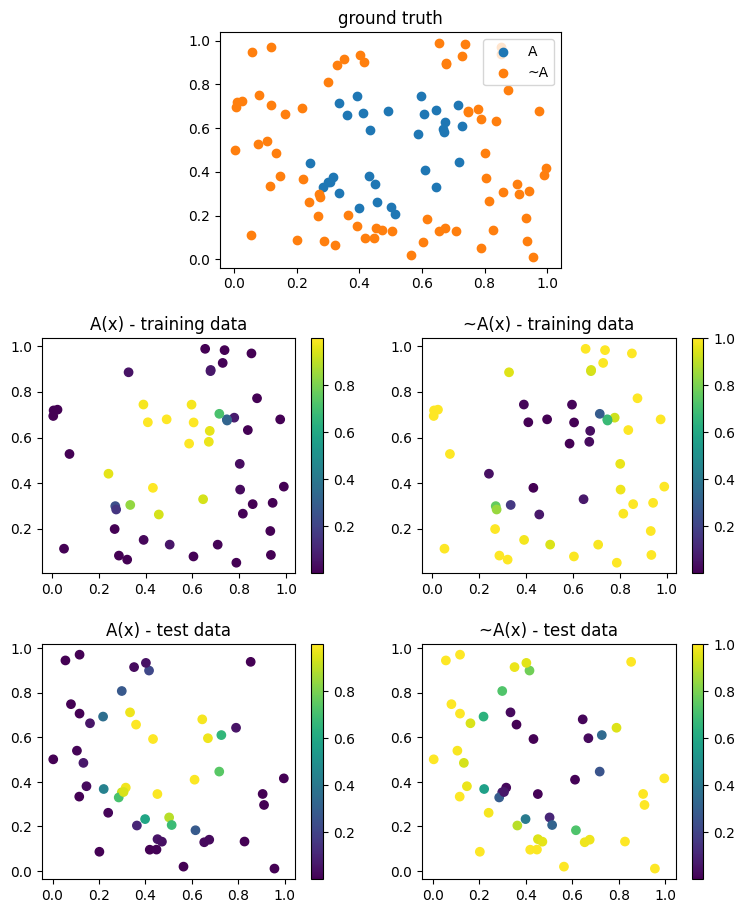

In [10]:
# 相关解释在ex1.md的## 3中
nr_samples_train = 50 # 定义用于训练的数据样本数量。

fig = plt.figure(figsize=(9, 11))

plt.subplots_adjust(wspace=0.2,hspace=0.3) # 调整子图之间的宽度和高度间距。
ax = plt.subplot2grid((3,8),(0,2),colspan=4) # 是 Matplotlib 中用于在网格布局中创建子图的函数。创建一个 3x8 网格，进而创建一个子图对象并返回，这个子图对象从第 0 行第 2 列开始，占 4 列，rowspan默认是1，也就是说，这个子图默认占一行 # 返回值是一个 Axes 对象，也就是子图对象。
ax.set_title("ground truth")
# 在子图上绘制类别 A 和 ~A 的数据点。
ax.scatter(dataset[labels_dataset][:,0],dataset[labels_dataset][:,1],label='A')
ax.scatter(dataset[torch.logical_not(labels_dataset)][:,0],dataset[torch.logical_not(labels_dataset)][:,1],label='~A')
ax.legend()
# 从下面具体绘制出来的图就可以看出来，分成了三行，现在绘制的是第一行的第一个子图。第一行一个子图，第二行两个子图，第三行两个子图。



# Training data # 训练数据
x = ltn.Variable("x",dataset[:nr_samples_train]) # 定义 LTN 变量 x，其值为前 50 个训练数据样本。
fig.add_subplot(3, 2, 3) # 添加一个 3x2 网格的子图，在第 3 个位置。
result=A(x)
plt.title("A(x) - training data")
# plt.scatter(dataset[:nr_samples_train,0],dataset[:nr_samples_train,1],c=result.value.detach().numpy().squeeze()) # 原来的写法会报错
plt.scatter(dataset[:nr_samples_train,0],dataset[:nr_samples_train,1],c=result.value.detach().cpu().numpy().squeeze()) # 绘制训练数据的散点图，颜色表示 A(x) 的值。 # squeeze()函数的作用是去掉维数为1的维度
plt.colorbar()

fig.add_subplot(3, 2, 4) # 添加一个 3x2 网格的子图，在第 4 个位置。
result=Not(A(x))
plt.title("~A(x) - training data")
# plt.scatter(dataset[:nr_samples_train,0],dataset[:nr_samples_train,1],c=result.value.detach().numpy().squeeze())
plt.scatter(dataset[:nr_samples_train,0],dataset[:nr_samples_train,1],c=result.value.detach().cpu().numpy().squeeze())
plt.colorbar()



# Test data # 测试数据
x = ltn.Variable("x",dataset[nr_samples_train:]) # 定义 LTN 变量 x，其值为测试数据样本。
fig.add_subplot(3, 2, 5) # 添加一个 3x2 网格的子图，在第 5 个位置。

result=A(x)
plt.title("A(x) - test data")
# plt.scatter(dataset[nr_samples_train:,0],dataset[nr_samples_train:,1],c=result.value.detach().numpy().squeeze())
plt.scatter(dataset[nr_samples_train:,0],dataset[nr_samples_train:,1],c=result.value.detach().cpu().numpy().squeeze())
plt.colorbar()

fig.add_subplot(3, 2, 6)
result=Not(A(x))
plt.title("~A(x) - test data")
# plt.scatter(dataset[nr_samples_train:,0],dataset[nr_samples_train:,1],c=result.value.detach().numpy().squeeze())
plt.scatter(dataset[nr_samples_train:,0],dataset[nr_samples_train:,1],c=result.value.detach().cpu().numpy().squeeze())
plt.colorbar()
plt.savefig("ex_binary_testing.pdf") # 将图像保存为 PDF 文件。保存的是整个Figure对象，而不是单个Axes对象（即子图）。
plt.show()

### Discussion

This first example, although straightforward, illustrates step-by-step the process of using LTN on a simple setting.

In particular, the knowledge has been used only to give the ground truth to the model. Through the knowledge, the model
knows that predicate $A$ has to be maximized when the input is a positive example, while it has to be minimized when the
input is a negative example. This is exactly what the binary cross-entropy does. So, using LTN we have reached the same
result with just a different setting.

In general, methods such LTN work well when the knowledge codifies new information respect to the ground truth. In other
words, when information that come from data and knowledge is complementary, namely it is not redundant.

In the next tutorials, we will show how the LTN language can be used to solve progressively more complex
problems by combining learning and reasoning.

### 讨论

这个第一个例子虽然简单，但逐步展示了在一个简单环境中使用 LTN 的过程。

特别地，知识只用于给模型提供真实值（ground truth）（ # todo:这里到底啥意思？）。通过这些知识，（细化来看，中间应该还通过loss函数，通过让loss函数的值不断减小），模型知道当输入是正例时，谓词 $A$ 需要被最大化，而当输入是负例时，谓词 $A$ 需要被最小化。这与二元交叉熵的作用完全一致。因此，使用 LTN，我们在不同设置下达到了相同的结果。

一般来说，当知识相对于真实值（ground truth）编码了新信息时，像 LTN 这样的方法效果很好。换句话说，当来自数据和知识的信息是互补的，即不重复时，这些方法效果最佳。

在接下来的教程中，我们将展示如何使用 LTN 语言通过结合学习和推理来解决越来越复杂的问题。